In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets  # library to download and use data from

In [2]:
dataset = pd.read_csv('breast_cancer_genomic.csv', encoding='UTF-8')
dataset.head()

,CLID,Class,Hs.2256,Hs.346950,Hs.256697,Hs.434053,Hs.194726,Hs.74624,Hs.1578,Hs.30743,...,Hs.118962,Hs.250822,Hs.82563,Hs.418533,Hs.433416,Hs.436348,Hs.388664,Hs.302690,Hs.293885,Hs.82109
0,Sample 115,0,-0.227,0.093,0.330,-0.672,0.197,3.433,2.044,-1.421,...,-0.813,3.024,0.272,-0.751,-1.259,0.240,-1.170,-0.070,-0.164,-0.680
1,Exp21630,0,-1.482,0.326,0.112,-0.649,-0.727,0.033,1.103,1.782,...,-1.215,0.379,0.376,-0.845,-0.611,-0.270,-1.038,-0.830,0.065,-0.711
2,Exp21626,0,-1.796,-0.346,3.006,-0.195,0.213,-0.628,0.488,1.429,...,-0.069,2.760,1.447,-0.712,0.564,0.730,-0.394,-1.313,-1.117,0.428
3,Exp21611,0,-3.011,-0.373,-0.161,1.019,6.353,0.147,0.330,-0.838,...,-0.071,-0.056,-0.855,-0.356,-0.313,0.306,0.178,0.083,-0.409,-0.167
4,Sample 39 >5 yr survival(132 months) age 46 e...,0,-0.437,3.585,-1.209,0.448,2.649,3.110,-0.695,-0.987,...,-0.682,0.129,0.683,-0.311,0.383,0.963,-0.848,-1.383,0.193,0.592


In [3]:
y = dataset['Class'].values
X = dataset.iloc[:, 2:].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn import metrics
from termcolor import colored
from sklearn.model_selection import GridSearchCV

In [6]:
#SVC
from sklearn.svm import SVC

svc_parameters = {'kernel':('linear', 'sigmoid', 'rbf', 'poly'), 
                  'gamma': [0.001 ,0.01 ,0.1, 1, 10, 100], 
                  'C':[0.005, 0.0053, 0.0054, 0.0055, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.1, 0.2, 0.5, 0.75, 1, 5, 10]}

svc = SVC()

svc_clf = GridSearchCV(estimator=svc, param_grid=svc_parameters, scoring='accuracy', cv=10, n_jobs=-1) # n_jobs -> number of parallel jobs
                                               # -1 -> whatever the architecture allows

svc_clf.fit(X_train, y_train)

print(colored('Best parameters:', 'green'), svc_clf.best_params_,"\n") # print best parameters


Best parameters: {'C': 0.005, 'gamma': 0.001, 'kernel': 'linear'} 



In [7]:
#MLR
from sklearn.linear_model import LogisticRegression

mlr_parameters = [{'C': [1e-03 ,1e-02 ,1e-01, 1, 10, 15, 16, 20, 30, 40, 50, 60, 90, 100], 
                   'tol': [1e-07 ,1e-06 ,1e-05, 1e-04, 1e-03, 1e-02, 1e-01, 
                           0.64, 0.65, 0.66, 0.7, 0.8, 0.9, 1]}]

mlr = LogisticRegression(multi_class='multinomial', solver='newton-cg', penalty='l2')

mlr_clf = GridSearchCV(estimator=mlr, param_grid=mlr_parameters, scoring='accuracy', cv=10, n_jobs=-1)

mlr_clf.fit(X_train, y_train)

print(colored('Best parameters:', 'green'), mlr_clf.best_params_,"\n") # print best parameters



Best parameters: {'C': 0.1, 'tol': 0.65} 



In [8]:
#DT
from sklearn.tree import DecisionTreeClassifier

dt_parameters = [{'max_features': [160, 170, 180, 185, 190, 195, 200, 300] , 
                  'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}]
dt = DecisionTreeClassifier()

dt_clf = GridSearchCV(estimator=dt, param_grid=dt_parameters, scoring='accuracy', cv=10, n_jobs=-1)

dt_clf.fit(X_train, y_train)

print(colored('Best parameters:', 'green'), dt_clf.best_params_,"\n") # print best parameters



Best parameters: {'max_depth': 19, 'max_features': 180} 



In [9]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

svc_accuracy = []
mlr_accuracy = []
dt_accuracy = []

svc_cm = 0
mlr_cm = 0
dt_cm = 0

clf_svc_best = SVC(kernel = svc_clf.best_params_['kernel'], 
                   gamma = svc_clf.best_params_['gamma'], 
                   C = svc_clf.best_params_['C'])

clf_mlr_best = LogisticRegression(multi_class='multinomial', 
                                  solver='newton-cg', 
                                  penalty='l2', 
                                  C = mlr_clf.best_params_['C'], 
                                  tol = mlr_clf.best_params_['tol'])

clf_dt_best = DecisionTreeClassifier(max_depth = dt_clf.best_params_['max_depth'], 
                                     max_features = dt_clf.best_params_['max_features'])

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
   
    svc.fit(x_train_fold, y_train_fold)
    mlr.fit(x_train_fold, y_train_fold)
    dt.fit(x_train_fold, y_train_fold)
    
    predicted_svc = svc.predict(x_test_fold)
    predicted_mlr = mlr.predict(x_test_fold)
    predicted_dt = dt.predict(x_test_fold)
    
    svc_accuracy.append(svc.score(x_test_fold, y_test_fold))
    mlr_accuracy.append(mlr.score(x_test_fold, y_test_fold))
    dt_accuracy.append(dt.score(x_test_fold, y_test_fold))
    
    svc_cm += metrics.confusion_matrix(y_test_fold, predicted_svc)
    mlr_cm += metrics.confusion_matrix(y_test_fold, predicted_mlr)
    dt_cm += metrics.confusion_matrix(y_test_fold, predicted_dt)

In [89]:
import seaborn as sebrn
import matplotlib.pyplot as atlas

cancer_labels = ['Luminal B', 'Luminal A', 'Normal-like', 'Basal-like', 'HER2+']

def ConfusionMatrixConstructor(matrix):
    fx = sebrn.heatmap(matrix, annot=True, cmap='Blues', xticklabels='auto', yticklabels='auto', linewidths=4, linecolor='black', cbar=False)
    fx.set_title('Confusion Matrix\n');
    fx.set_xlabel('\nPredicted Values')
    fx.set_ylabel('Actual Values\n');
    fx.xaxis.set_ticklabels(cancer_labels)
    fx.yaxis.set_ticklabels(cancer_labels)
    fx.set_yticklabels(fx.get_yticklabels(),rotation = 0)
    atlas.show()

In [90]:
from statistics import mean, stdev

def OverallAccuracyReport(model_accuracy):
    return ('%.3f' % mean(model_accuracy))

def OverallSdvReport(model_accuracy):
    return ('+/- %.3f' % stdev(model_accuracy) )


In [91]:
def ReportForOneClass(matrix, class_index):
    i = 0
    j = 0
    
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for row in matrix:
        for element in row:
            if(i == class_index and j == class_index):
                tp += element
            
            if(i == class_index and j != class_index):
                fp += element
                
            if(i != class_index and j == class_index):
                fn += element
            
            if(i != class_index and j != class_index):
                tn += element
                
            j+=1
        
        j = 0
        i+=1
    
    total_predictions = tp + fp + tn + fn
    accuracy = round(((tp + tn) / total_predictions), 2)
    recall = round((tp / (tp + fn)), 2)
    precision = round((tp / (tp + fp)), 2)
    f_measure = round(((2*recall*precision) / (recall + precision)), 2)
    
    result = [accuracy, recall, precision, f_measure]
    return result

In [92]:
def ConfusionMatrixReport(matrix):
    upper_limit = matrix.shape[0]
    matrix_results = []
    for i in range(0, upper_limit):
        matrix_results.append(ReportForOneClass(matrix, i))
        
    return matrix_results

In [93]:
def ReportConstructor(result, accuracy):
    df1 = pd.DataFrame(result,
                      index=pd.Index(cancer_labels),
                     columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    df2 = pd.DataFrame([[OverallAccuracyReport(accuracy)]], index = pd.Index(['Overall Accuracy: ']), columns = [''])
    df3 = pd.DataFrame([[OverallSdvReport(accuracy)]], index = pd.Index(['Standard Deviation: ']), columns = [''])
    print(df1)
    print(df2)
    print(df3)

In [94]:
def ReportGenerator(model_name, model_cm, model_accuracy):
    print(model_name + ' model:')
    ConfusionMatrixConstructor(model_cm)
    print('\tModel Classification Report:\n')
    result = ConfusionMatrixReport(model_cm)
    ReportConstructor(result, model_accuracy)

SVC model:


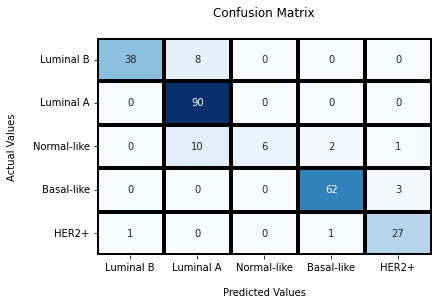

	Model Classification Report:

             Accuracy  Precision  Recall  F1 Score
Luminal B        0.96       0.97    0.83      0.89
Luminal A        0.93       0.83    1.00      0.91
Normal-like      0.95       1.00    0.32      0.48
Basal-like       0.98       0.95    0.95      0.95
HER2+            0.98       0.87    0.93      0.90
                         
Overall Accuracy:   0.896
                               
Standard Deviation:   +/- 0.047


In [95]:
ReportGenerator('SVC', svc_cm, svc_accuracy)

Multinominal Logistic Regression model:


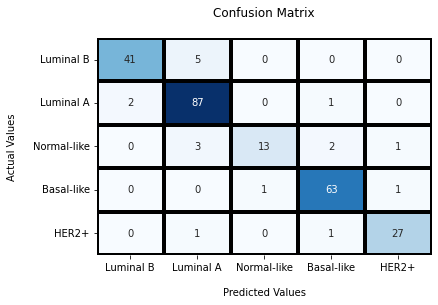

	Model Classification Report:

             Accuracy  Precision  Recall  F1 Score
Luminal B        0.97       0.95    0.89      0.92
Luminal A        0.95       0.91    0.97      0.94
Normal-like      0.97       0.93    0.68      0.79
Basal-like       0.98       0.94    0.97      0.95
HER2+            0.98       0.93    0.93      0.93
                         
Overall Accuracy:   0.928
                               
Standard Deviation:   +/- 0.056


In [96]:
ReportGenerator('Multinominal Logistic Regression', mlr_cm, mlr_accuracy)

Decision Tree model:


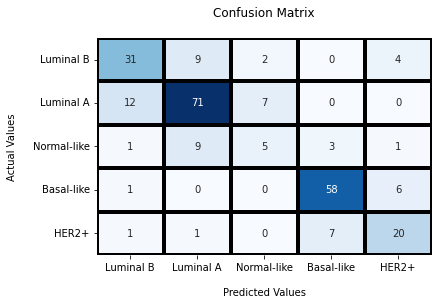

	Model Classification Report:

             Accuracy  Precision  Recall  F1 Score
Luminal B        0.88       0.67    0.67      0.67
Luminal A        0.85       0.79    0.79      0.79
Normal-like      0.91       0.36    0.26      0.30
Basal-like       0.93       0.85    0.89      0.87
HER2+            0.92       0.65    0.69      0.67
                         
Overall Accuracy:   0.743
                               
Standard Deviation:   +/- 0.066


In [97]:
ReportGenerator('Decision Tree', dt_cm, dt_accuracy)

In [98]:
from mlxtend.evaluate import paired_ttest_5x2cv
def hypothesisTest(estimator1, estimator2):
    t,p = paired_ttest_5x2cv(estimator1=estimator1, estimator2=estimator2, X=X, y=y, scoring='accuracy', random_seed=1)
    print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
    if p <= 0.05:
        print('Difference between mean performance is probably real')
    else:
        print('Algorithms probably have the same performance')

In [99]:
hypothesisTest(svc, mlr)

P-value: 1.000, t-Statistic: 0.000
Algorithms probably have the same performance


In [100]:
hypothesisTest(svc, dt)

P-value: 0.009, t-Statistic: 4.132
Difference between mean performance is probably real


In [101]:
hypothesisTest(mlr, dt)

P-value: 0.056, t-Statistic: 2.471
Algorithms probably have the same performance
